In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
from tqdm import tqdm
keras = tf.keras

In [13]:
dir_img = '/home/riccardo/PycharmProjects/Test1/data/Grains'
dir_mask = '/home/riccardo/PycharmProjects/Test1/data/Segmented'
list_img = sorted(os.listdir(dir_img))


In [14]:
list_img_path = []
for i in list_img:
    list_img_path.append(os.path.join(dir_img,i))

In [15]:
list_mask_path = []
for i in sorted(os.listdir(dir_mask)):
    list_mask_path.append(os.path.join(dir_mask,i))

In [16]:
list_img_load = []
for i in tqdm(list_img_path):
    img = plt.imread(i)
    list_img_load.append(img)

100%|██████████| 336/336 [00:01<00:00, 183.83it/s]


In [17]:
list_mask_load = []
for i in tqdm(list_mask_path):
    img = plt.imread(i)
    list_mask_load.append(img)

100%|██████████| 336/336 [00:00<00:00, 985.04it/s] 


In [18]:
split = int(len(list_img_load)*0.75)

In [19]:
list_mask_load = np.array(list_mask_load)/255
list_mask_load = np.where(list_mask_load > 0.5, 1, 0)
list_img_load = np.array(list_img_load)

In [20]:
X_train = list_img_load[:split]
Y_train = list_mask_load[:split]
X_test = list_img_load[split:]
Y_test = list_mask_load[split:]

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(300, 400, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 400, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 400, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 300, 400, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 300, 400, 64)      36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 300, 400, 1)       577       
Total params: 66,145
Trainable params: 66,145
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x=X_train, y=Y_train, validation_data=(X_test,Y_test), batch_size=8, epochs=30)

2024-02-21 18:02:53.642115: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-02-21 18:02:53.661266: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3399905000 Hz


Epoch 1/30


2024-02-21 18:02:54.121119: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-02-21 18:02:54.567304: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8906
2024-02-21 18:02:54.803472: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-02-21 18:02:54.803724: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


32/32 [==============================] - 9s 208ms/step - loss: 0.5685 - accuracy: 0.6964 - val_loss: 0.4580 - val_accuracy: 0.7957
Epoch 2/30
32/32 [==============================] - 6s 172ms/step - loss: 0.4898 - accuracy: 0.7743 - val_loss: 0.4323 - val_accuracy: 0.8151
Epoch 3/30
32/32 [==============================] - 5s 172ms/step - loss: 0.4550 - accuracy: 0.7965 - val_loss: 0.4255 - val_accuracy: 0.8204
Epoch 4/30
32/32 [==============================] - 6s 173ms/step - loss: 0.4442 - accuracy: 0.8018 - val_loss: 0.4023 - val_accuracy: 0.8256
Epoch 5/30
32/32 [==============================] - 6s 174ms/step - loss: 0.4289 - accuracy: 0.8078 - val_loss: 0.3907 - val_accuracy: 0.8308
Epoch 6/30
32/32 [==============================] - 6s 175ms/step - loss: 0.4324 - accuracy: 0.8075 - val_loss: 0.3866 - val_accuracy: 0.8324
Epoch 7/30
32/32 [==============================] - 6s 174ms/step - loss: 0.4184 - accuracy: 0.8142 - val_loss: 0.3841 - val_accuracy: 0.8318
Epoch 8/30
32/32 

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
epochs_range = range(30)

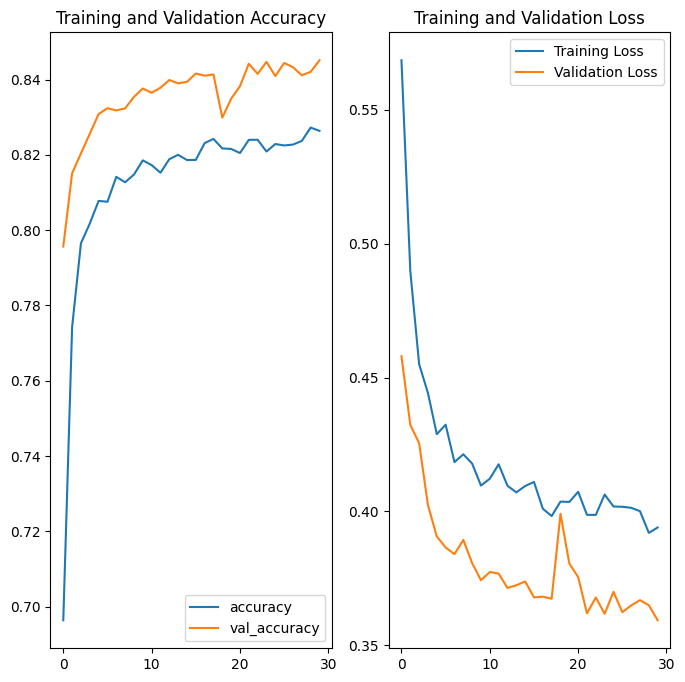

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='accuracy')
plt.plot(epochs_range, val_acc, label='val_accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
model.save('test_grain_py39_tf250.h5')

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

model = load_model('Models/test_grain_py39_tf250.h5')

In [29]:
test = model.predict(X_train[0].reshape(1,300,400,3))

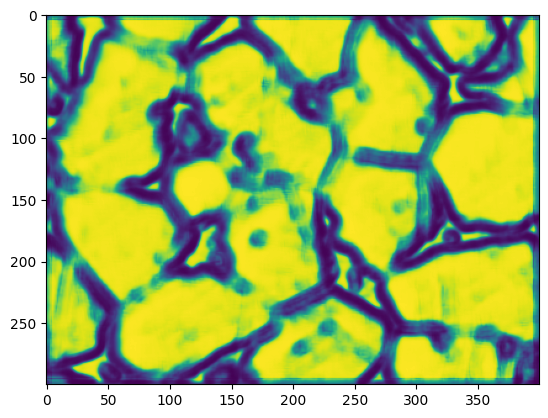

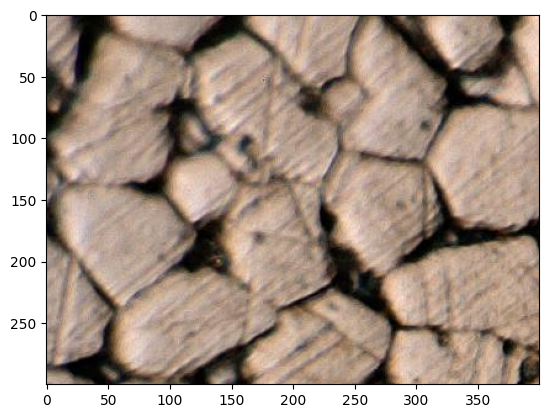

In [30]:
plt.imshow(test.reshape(-1,400,1))
plt.show()
plt.imshow(X_train[0])